t-SNE 알고리즘을 이용해 차원 축소

In [49]:
#MNIST 데이터셋 가져오
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', as_frame=False, parser='auto')

In [50]:
X, y= mnist.data, mnist.target

In [51]:
X_sample, y_sample=X[:5000], y[:5000]

In [52]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, init="random", learning_rate="auto",
          random_state=42)

In [53]:
%time X_reduced=tsne.fit_transform(X_sample)

CPU times: user 1min 32s, sys: 6.11 s, total: 1min 38s
Wall time: 13.1 s


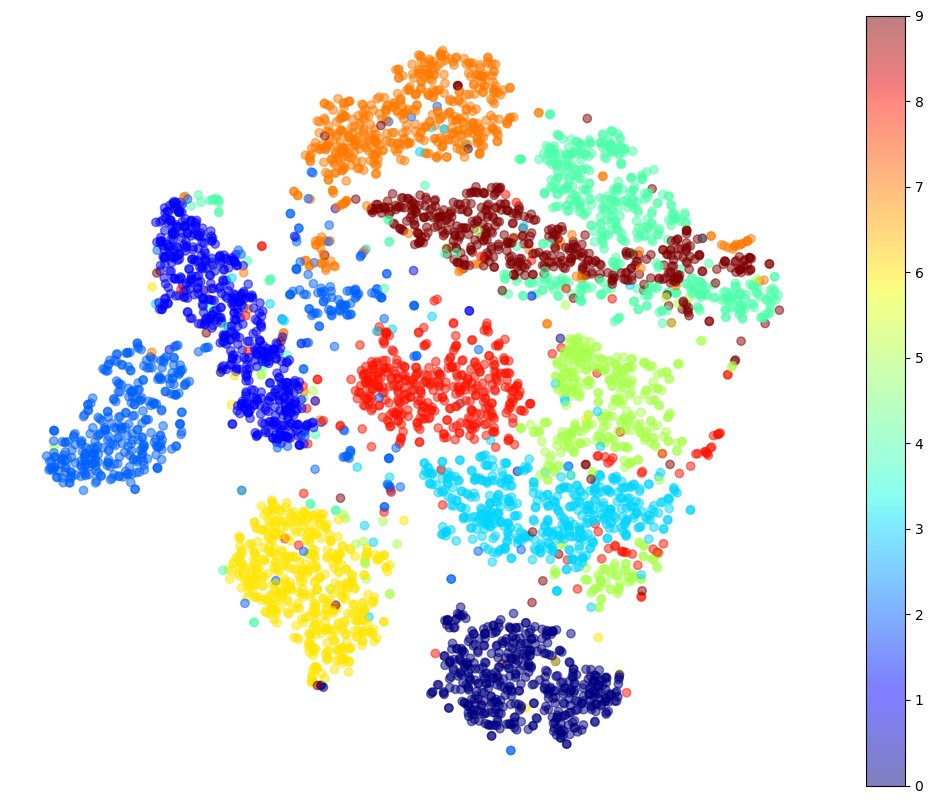

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1],
           c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

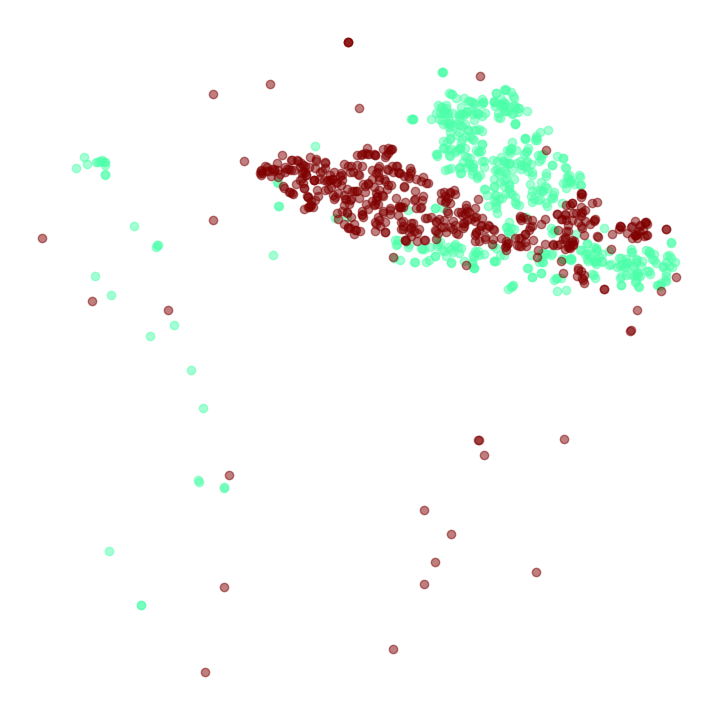

In [55]:
#겹치는 부분만 출력
plt.figure(figsize=(9,9))
cmap=plt.cm.jet
for digit in ('4','9'):
    plt.scatter(X_reduced[y_sample==digit, 0], X_reduced[y_sample==digit,1],
               c=[cmap(float(digit)/9)], alpha=0.5)
plt.axis('off')
plt.show()

In [56]:
#위 두개의 숫자만으로 t-SNE 실행하기
idx=(y_sample=='4')|(y_sample=='9')
X_subset=X_sample[idx]
y_subset=y_sample[idx]

tsne_subset=TSNE(n_components=2, init="random", learning_rate="auto",
                random_state=42)
X_subset_reduced=tsne_subset.fit_transform(X_subset)

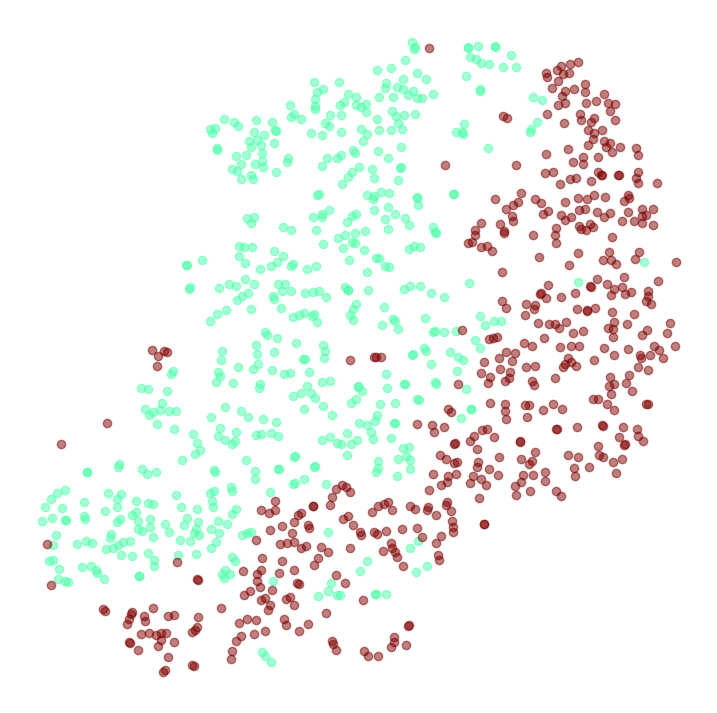

In [57]:
plt.figure(figsize=(9,9))
for digit in ('4','9'):
    plt.scatter(X_subset_reduced[y_subset==digit, 0],
               X_subset_reduced[y_subset==digit, 1],
               c=[cmap(float(digit)/9)], alpha=0.5)
plt.axis('off')
plt.show()

In [58]:
#여러 색깔로 숫자를 쓰는 함수 구현하기
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13,10)):
    #입력 특성의 스케일 조정: 0~1
    X_normalized = MinMaxScaler().fit_transform(X)
        
    #지금까지 그린 숫자의 좌표 목록 만들기
    neighbors = np.array([[10., 10.]])
    
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  #현재 축 가져오기
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

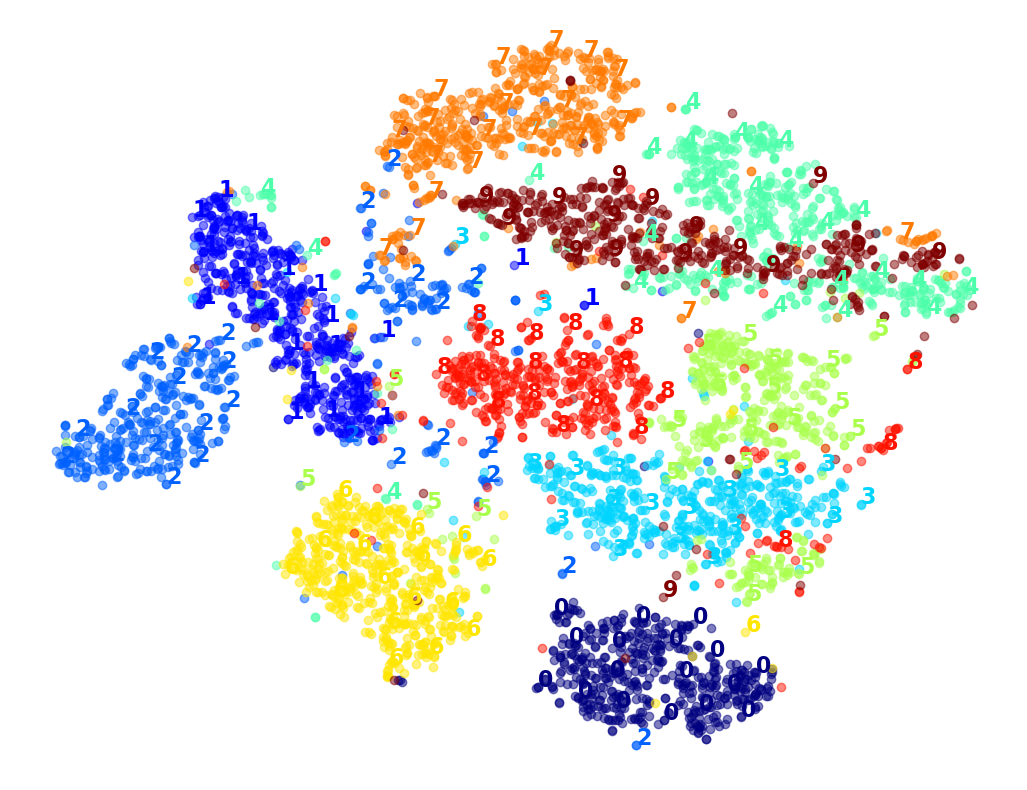

In [59]:
plot_digits(X_reduced, y_sample)

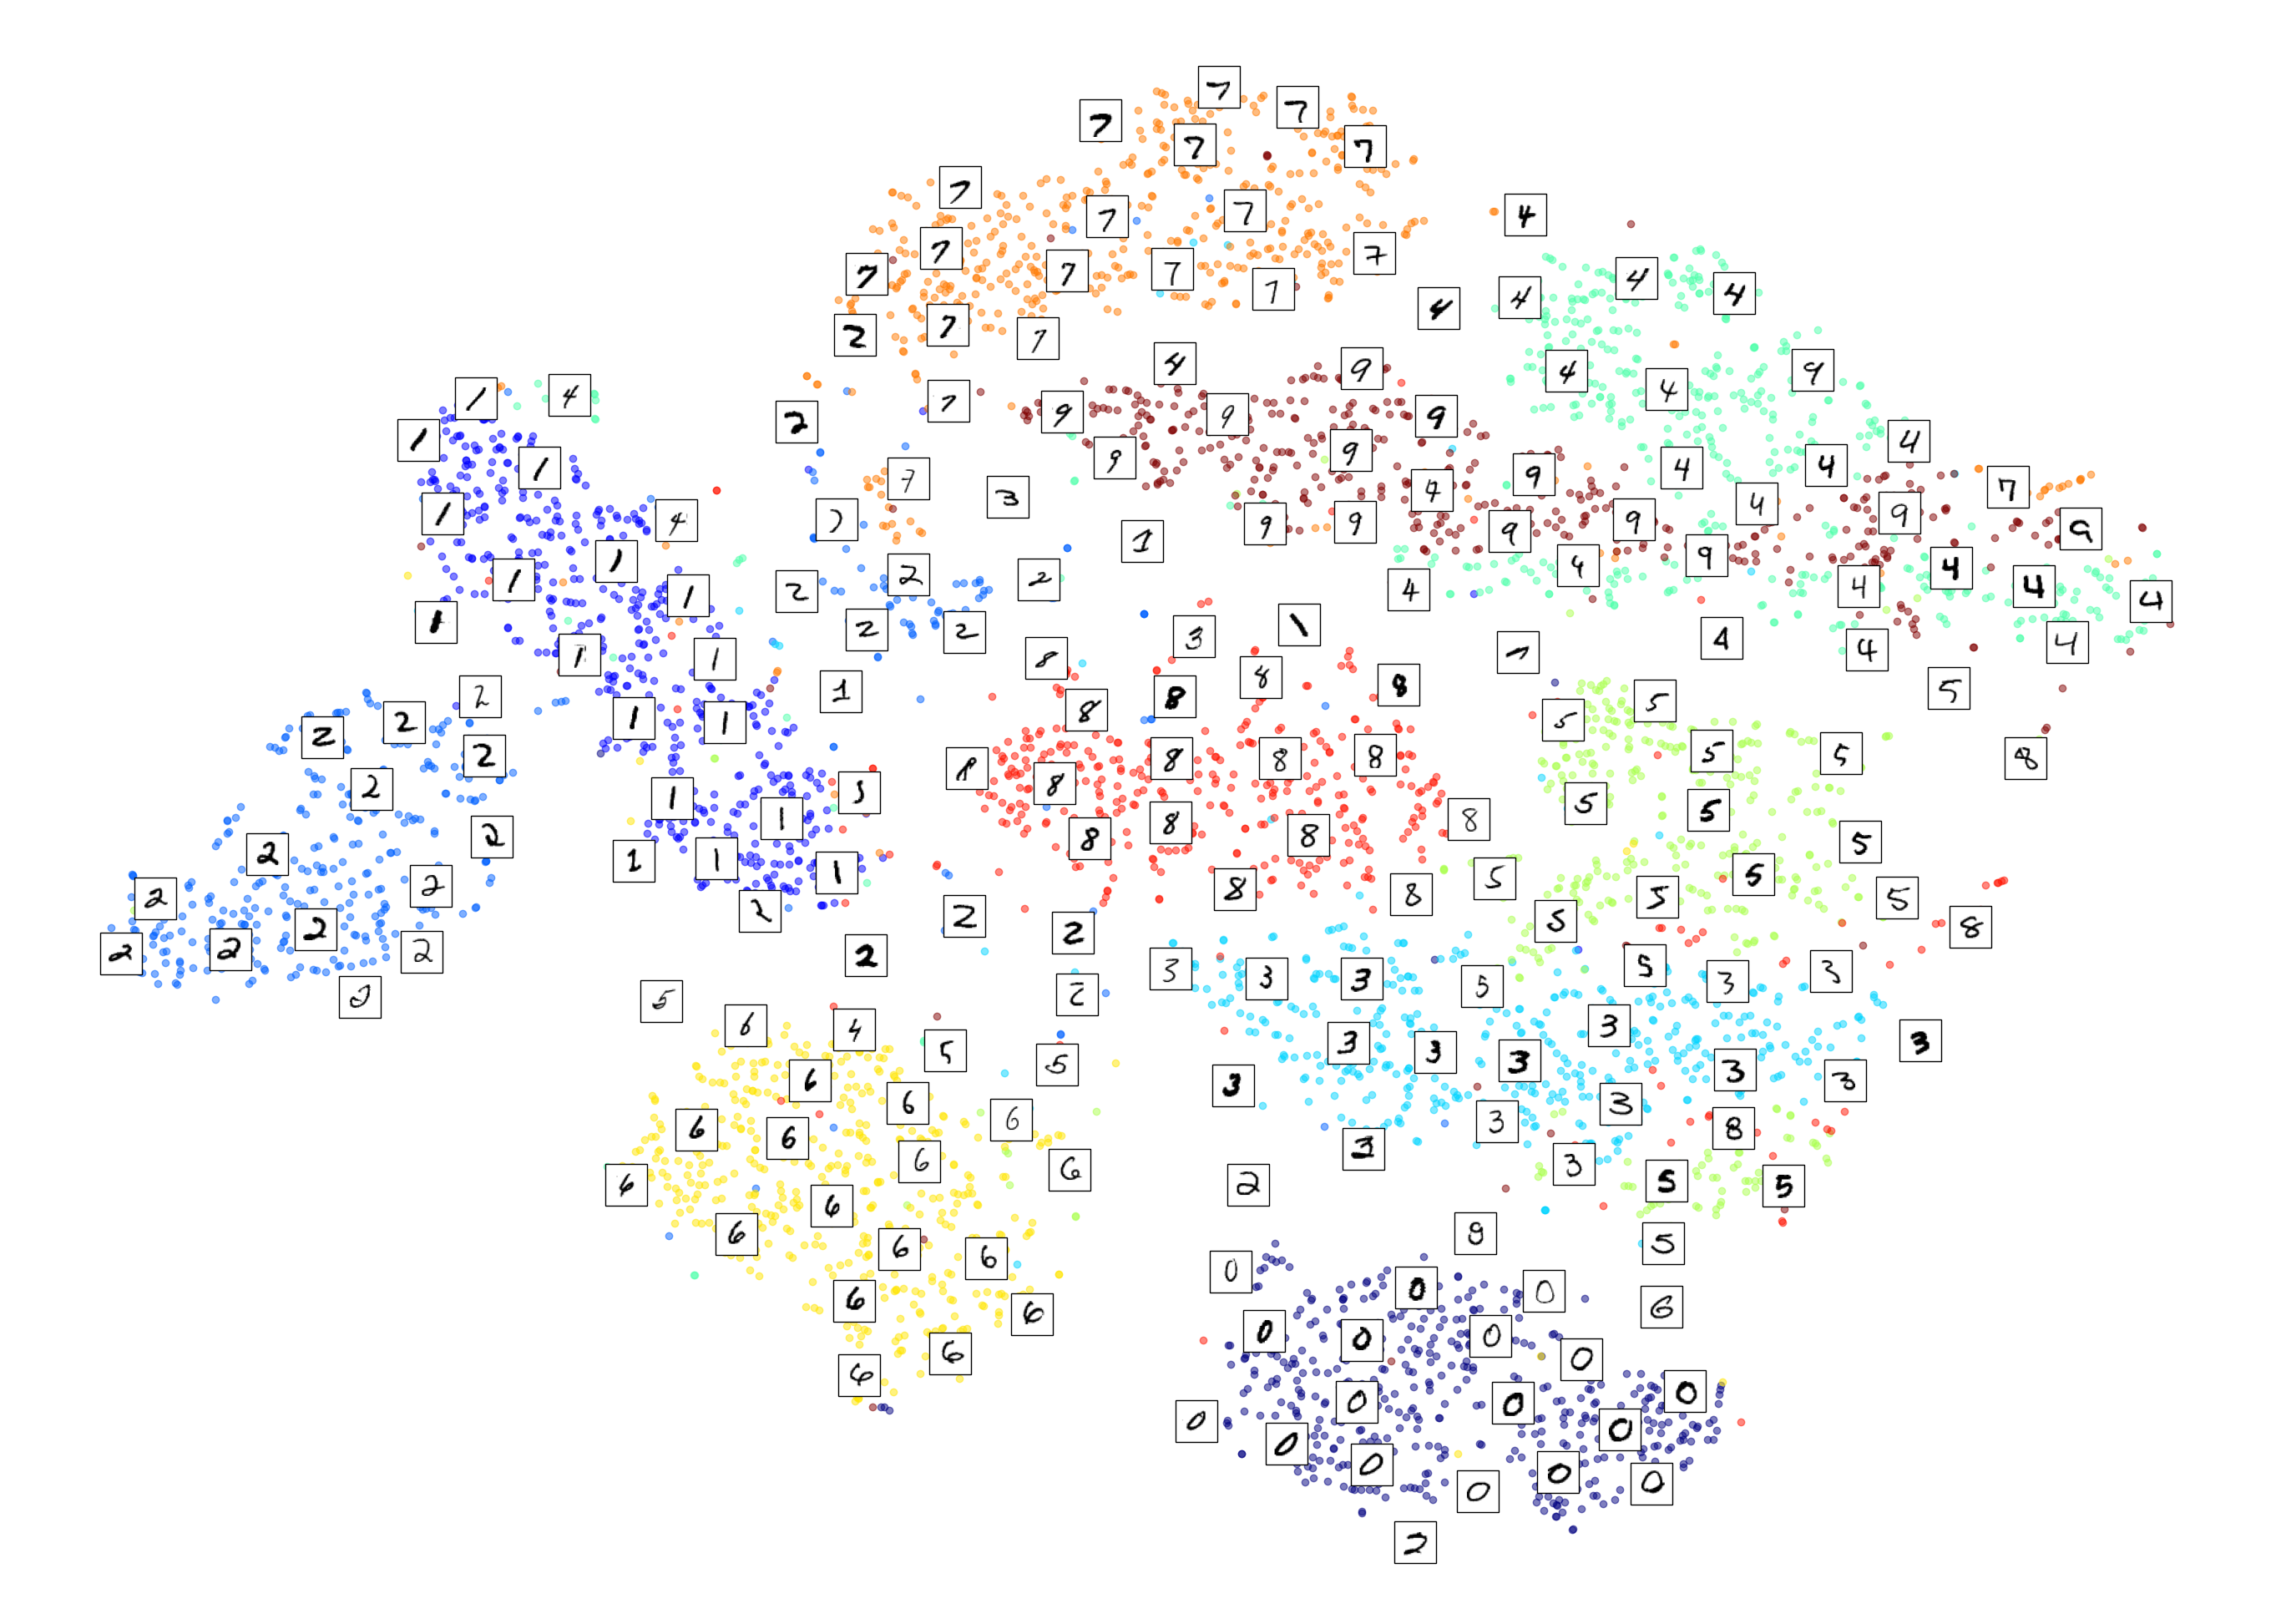

In [61]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35,25))

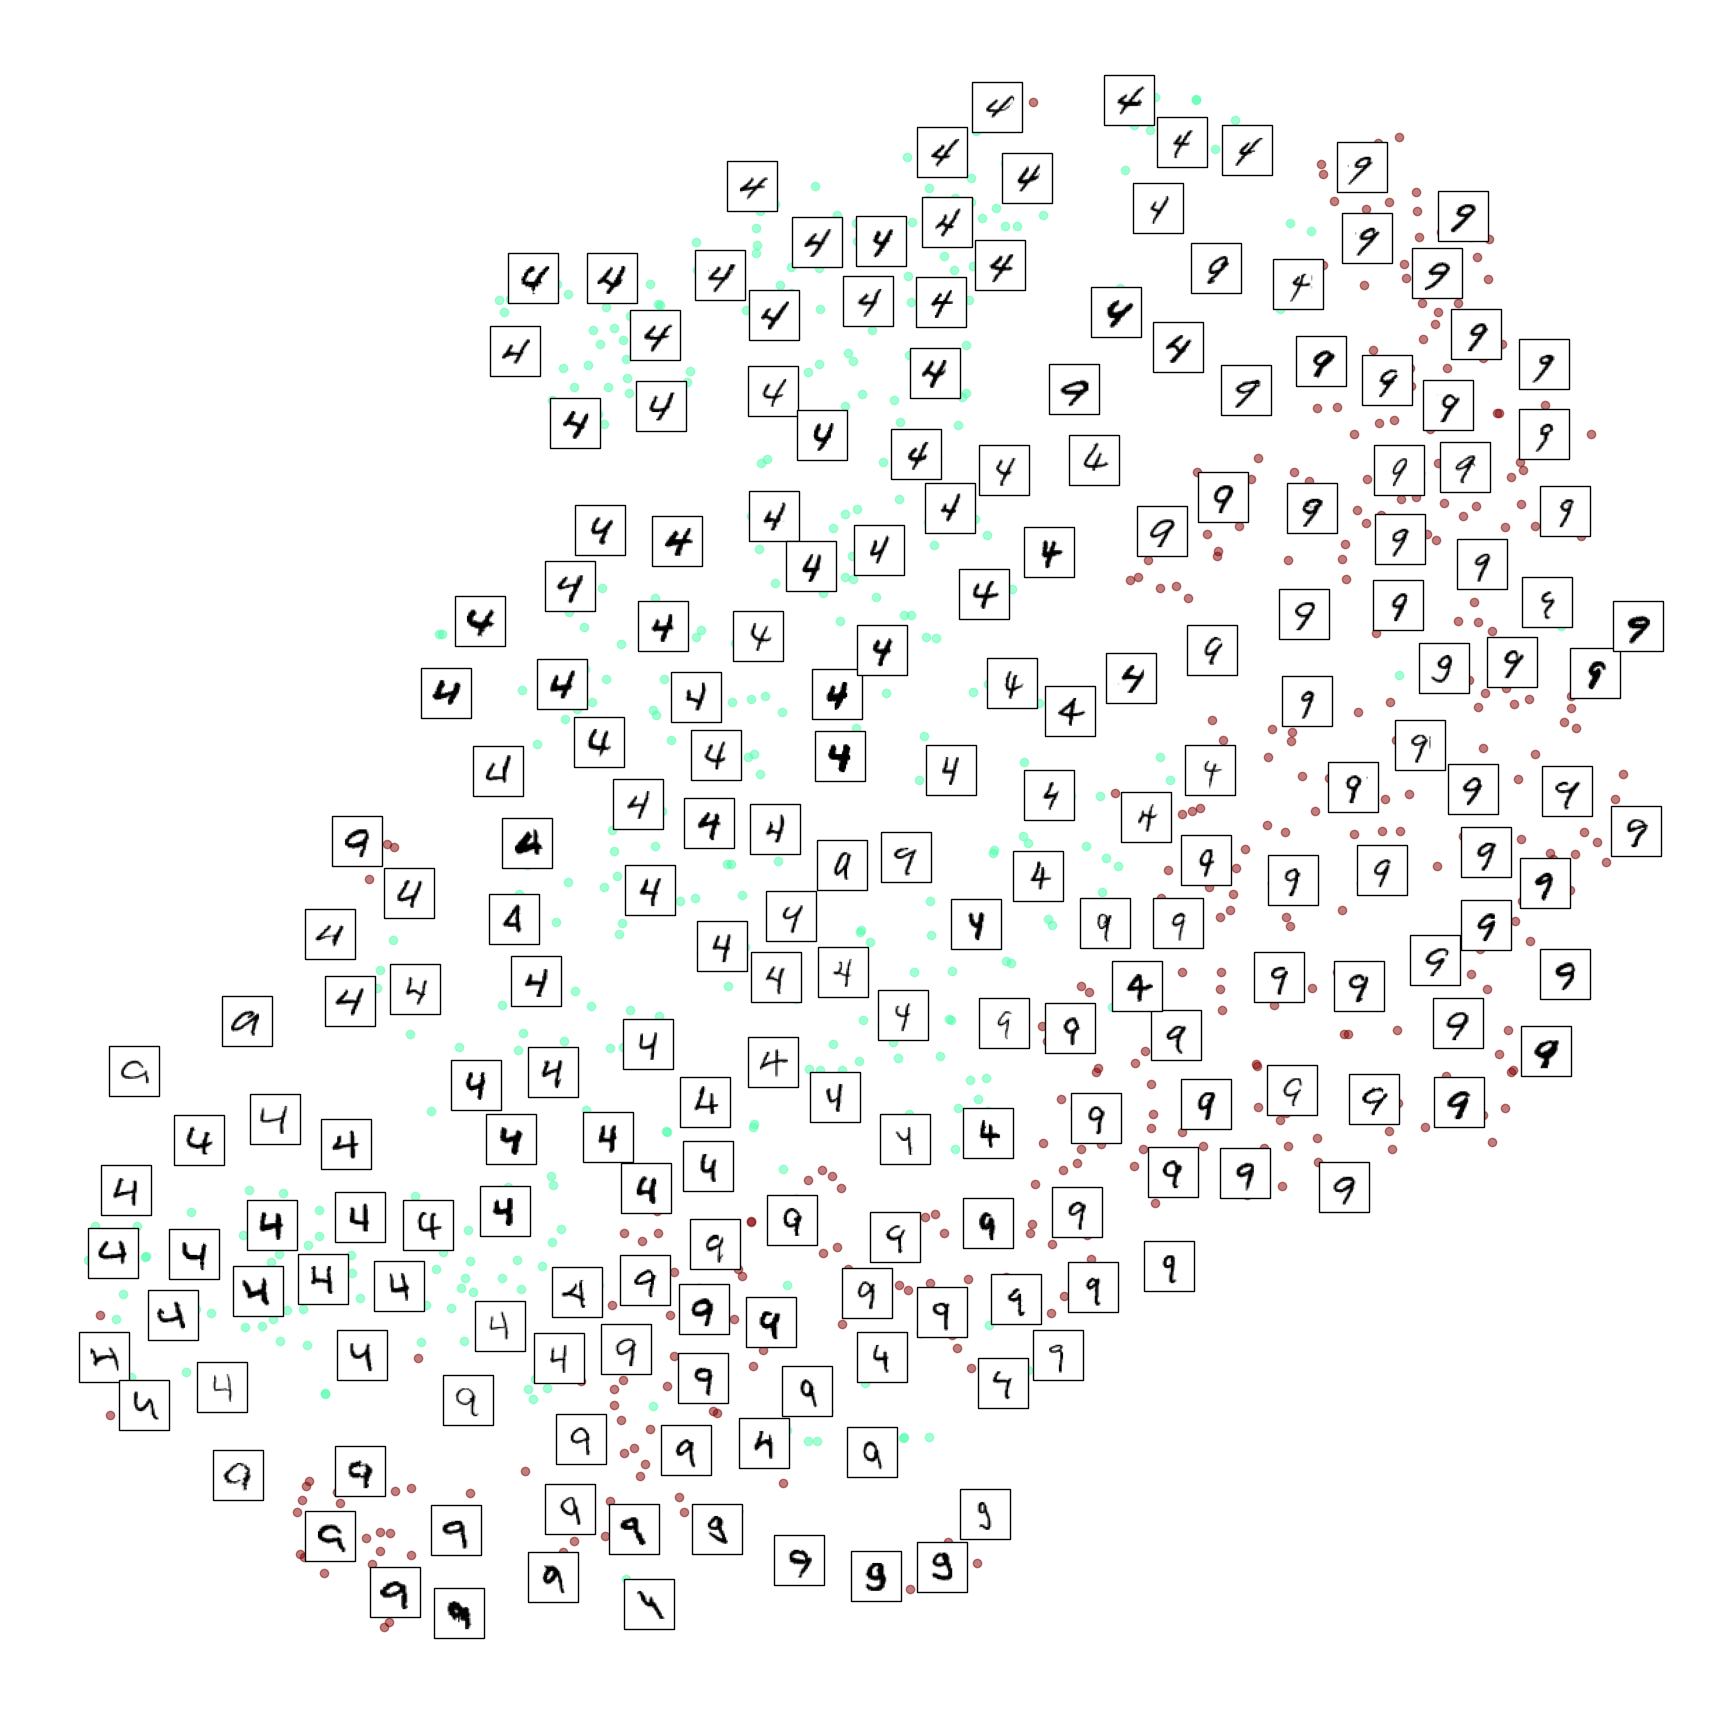

In [62]:
#4와 9만 출력하기
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22,22))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


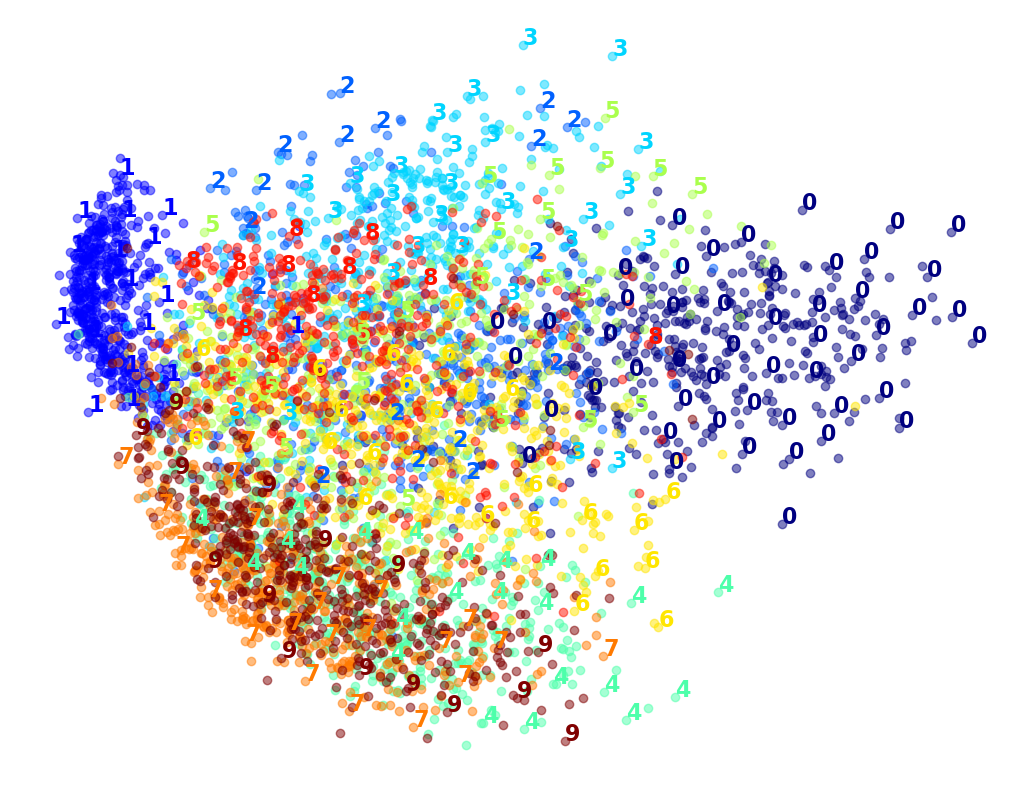

In [64]:
#PCA 적용해보기
from sklearn.decomposition import PCA

pca=PCA(n_components=2, random_state=42)
%time X_pca_reduced=pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

In [66]:
#lle 적용해보기
from sklearn.manifold import LocallyLinearEmbedding

lle=LocallyLinearEmbedding(n_neighbors=5, n_components=2,
                          random_state=42)
%time X_lle_reduced=lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

CPU times: user 11.6 s, sys: 1.04 s, total: 12.7 s
Wall time: 1.75 s


CPU times: user 12.1 s, sys: 1.32 s, total: 13.4 s
Wall time: 1.83 s


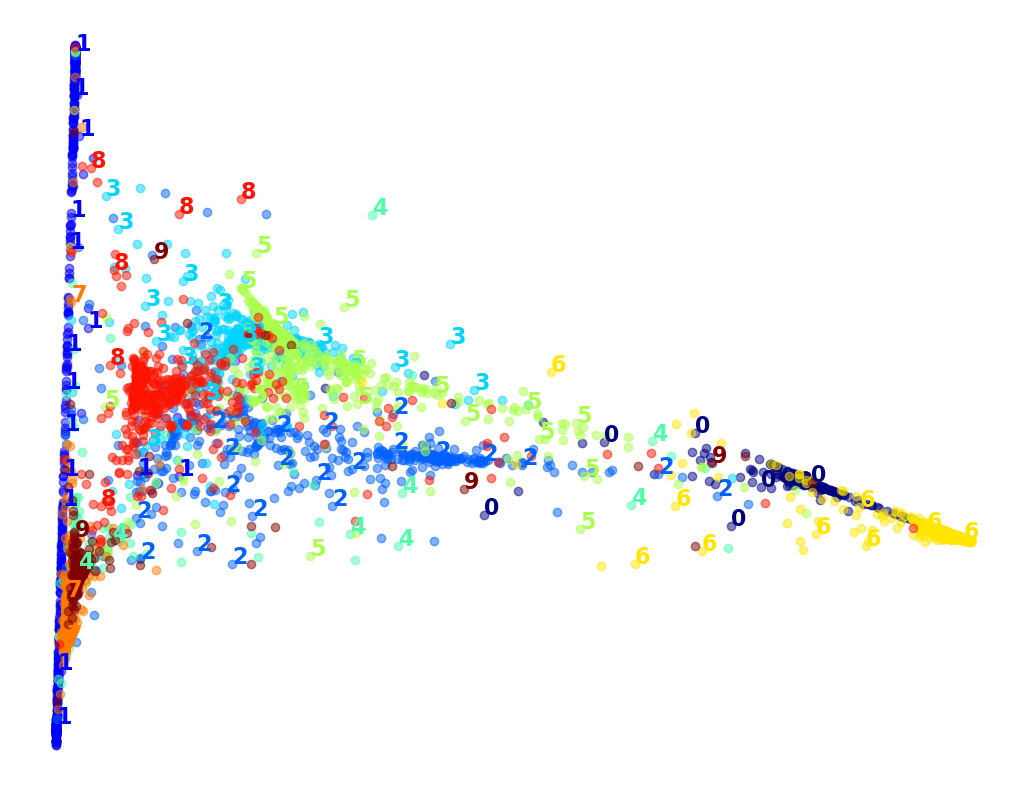

In [68]:
#분산을 보존하면서 PCA를 먼저 적용
from sklearn.pipeline import make_pipeline

pca_lle=make_pipeline(PCA(n_components=0.95),
                     LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced= pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

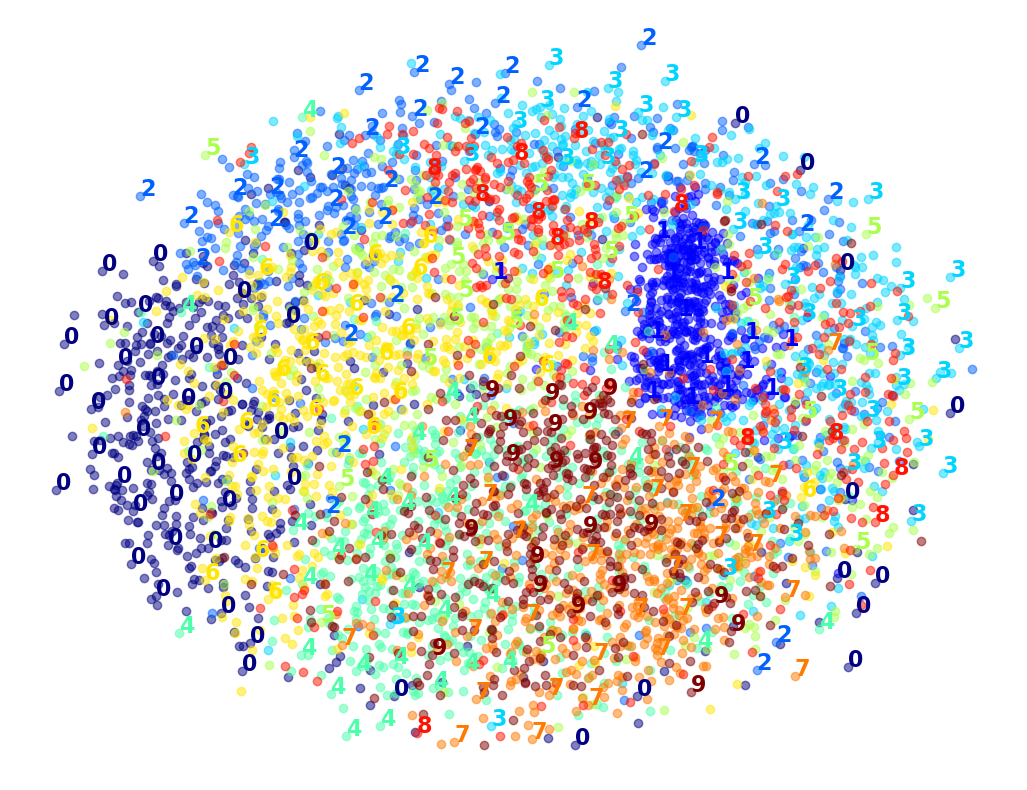

In [70]:
#MDS 적용해보기
from sklearn.manifold import MDS

mds=MDS(n_components=2, normalized_stress=False, 
        random_state=42)
X_mds_reduced=mds.fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

CPU times: user 20min 33s, sys: 27min 23s, total: 47min 57s
Wall time: 7min 57s


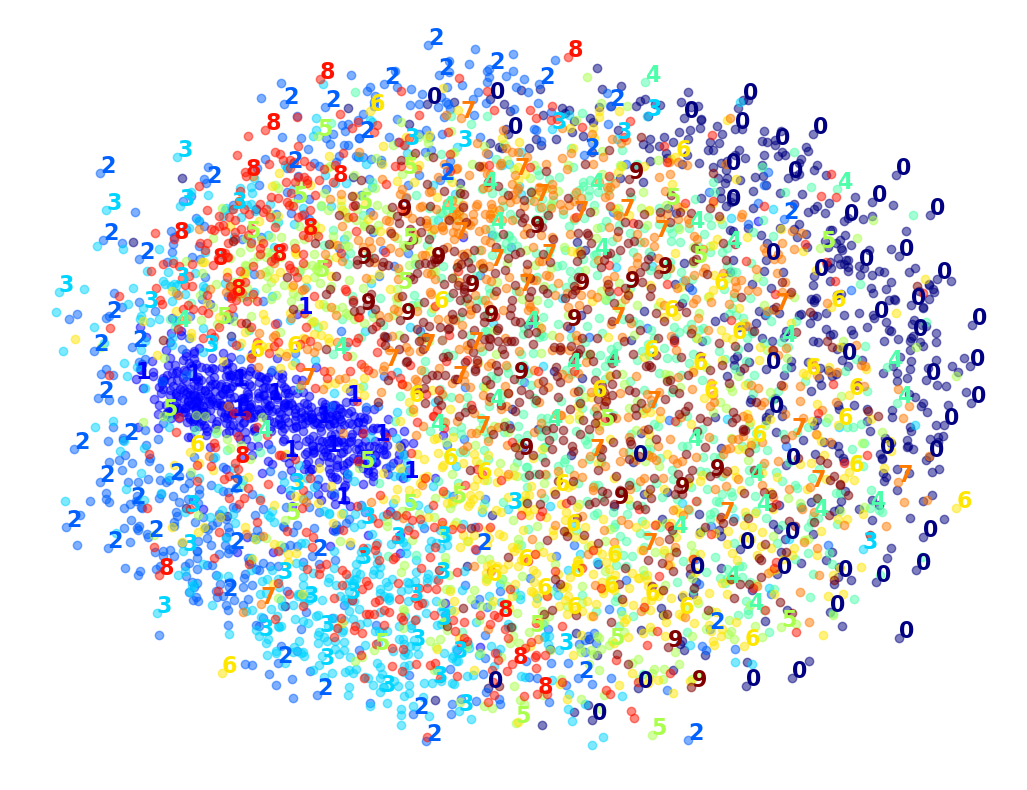

In [71]:
#분산 보존 PCA를 먼저 적용
pca_mds=make_pipeline(PCA(n_components=0.95, random_state=42),
                     MDS(n_components=2, normalized_stress=False))

%time X_pca_mds_reduced=pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


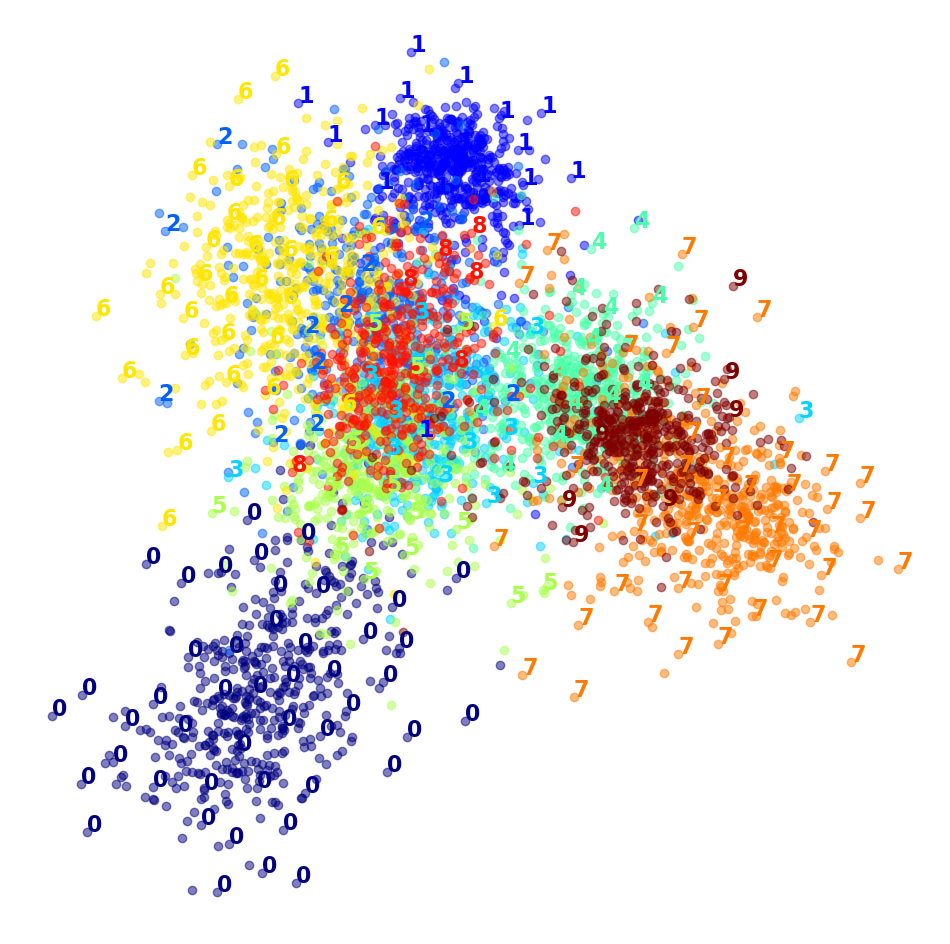

In [77]:
#LDA 적용해보기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced=lda.fit_transform(X_sample,y_sample)
plot_digits(X_lda_reduced, y_sample, figsize=(12,12))
plt.show()